In [1]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
img=cv2.imread("/content/prof.jpg")
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [3]:
#load the classifier

face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [4]:
#Perform the Face Detection

face = face_classifier.detectMultiScale(
    gray_img, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)


In [5]:
#now we will draw a rectangular bounding box around the face

for (x,y,w,h) in face:
  cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)     #2 is the thickness of the boundary of the bounding box

In [6]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(-0.5, 1294.5, 1599.5, -0.5)

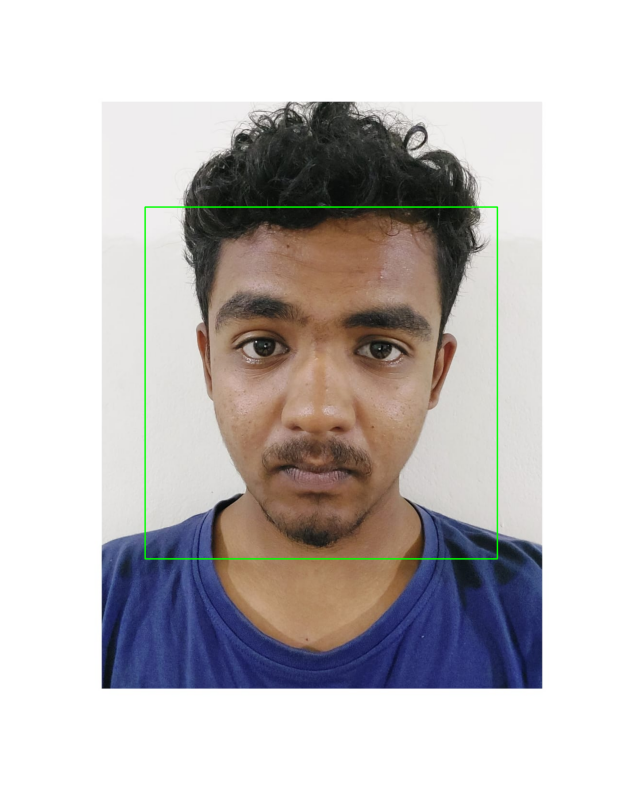

In [7]:
plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')

In [8]:
trainingImagePath = '/content/drive/MyDrive/Face Images/Final Training Images'
testImagePath = '/content/drive/MyDrive/Face Images/Final Testing Images'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)

In [ ]:
test_datagen = ImageDataGenerator()

In [ ]:
# Generating the Training Data
training_set = train_datagen.flow_from_directory(
        trainingImagePath,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 254 images belonging to 17 classes.


In [ ]:

# Generating the Testing Data
test_set = test_datagen.flow_from_directory(
        testImagePath,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 66 images belonging to 17 classes.


In [ ]:
# Printing class labels for each face
test_set.class_indices

{'face 17': 0,
 'face1': 1,
 'face10': 2,
 'face11': 3,
 'face12': 4,
 'face13': 5,
 'face14': 6,
 'face15': 7,
 'face16': 8,
 'face2': 9,
 'face3': 10,
 'face4': 11,
 'face5': 12,
 'face6': 13,
 'face7': 14,
 'face8': 15,
 'face9': 16}

In [ ]:
# class_indices have the numeric tag for each face
TrainClasses=training_set.class_indices

# Storing the face and the numeric tag
ResultMap={}
for faceValue,faceName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[faceValue]=faceName

# Saving the face map
import pickle
with open("ResultsMap.pkl", 'wb') as fileWriteStream:
    pickle.dump(ResultMap, fileWriteStream)

# The model will give answer as a numeric tag
print("Mapping of Face and its ID",ResultMap)

# The number of neurons for the output layer is equal to the number of faces
OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)

Mapping of Face and its ID {0: 'face 16', 1: 'face1', 2: 'face10', 3: 'face11', 4: 'face12', 5: 'face13', 6: 'face14', 7: 'face15', 8: 'face16', 9: 'face2', 10: 'face3', 11: 'face4', 12: 'face5', 13: 'face6', 14: 'face7', 15: 'face8', 16: 'face9'}

 The Number of output neurons:  17


In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:

classifier= Sequential()


classifier.add(Convolution2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=(64,64,3), activation='relu'))


classifier.add(MaxPool2D(pool_size=(2,2)))


classifier.add(Convolution2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu'))

classifier.add(MaxPool2D(pool_size=(2,2)))

classifier.add(Flatten())


classifier.add(Dense(64, activation='relu'))

classifier.add(Dense(OutputNeurons, activation='softmax'))


classifier.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])


classifier.fit(
    training_set,
    steps_per_epoch=8,         #number of steps per epoch = (Total number of training samples / Batch size)
    epochs=15,
    validation_data=test_set,
    validation_steps=10
)

Epoch 1/15
8/8 [==============================] - ETA: 0s - loss: 63.5284 - accuracy: 0.0827

8/8 [==============================] - 97s 12s/step - loss: 63.5284 - accuracy: 0.0827 - val_loss: 5.9722 - val_accuracy: 0.1212
Epoch 2/15
8/8 [==============================] - 6s 708ms/step - loss: 3.4045 - accuracy: 0.1181
Epoch 3/15
8/8 [==============================] - 5s 602ms/step - loss: 2.5106 - accuracy: 0.2559
Epoch 4/15
8/8 [==============================] - 5s 578ms/step - loss: 1.9658 - accuracy: 0.3740
Epoch 5/15
8/8 [==============================] - 7s 860ms/step - loss: 1.2145 - accuracy: 0.6496
Epoch 6/15
8/8 [==============================] - 5s 601ms/step - loss: 0.5535 - accuracy: 0.8307
Epoch 7/15
8/8 [==============================] - 6s 729ms/step - loss: 0.3199 - accuracy: 0.9094
Epoch 8/15
8/8 [==============================] - 5s 550ms/step - loss: 0.2443 - accuracy: 0.9173
Epoch 9/15
8/8 [==============================] - 6s 647ms/step - loss: 0.1903 - accuracy: 0.9291
Epoch 10/15
8/8 [==============================] - 6s 696ms/step - loss: 0.1373 - accur

In [ ]:

import numpy as np
from keras.preprocessing import image

ImagePath='/content/drive/MyDrive/Face Images/Final Testing Images/face 17/img1test.jpg'
test_image=image.load_img(ImagePath,target_size=(64, 64))
test_image=image.img_to_array(test_image)

test_image=np.expand_dims(test_image,axis=0)

result=classifier.predict(test_image,verbose=0)


print('Prediction is: ',ResultMap[np.argmax(result)])

Prediction is:  face 16


In [ ]:

import numpy as np
from keras.preprocessing import image

ImagePath='/content/drive/MyDrive/Face Images/Final Testing Images/face10/2face10.jpg'
test_image=image.load_img(ImagePath,target_size=(64, 64))
test_image=image.img_to_array(test_image)

test_image=np.expand_dims(test_image,axis=0)

result=classifier.predict(test_image,verbose=0)
print(training_set.class_indices)


print('Prediction is: ',ResultMap[np.argmax(result)])

{'face 16': 0, 'face1': 1, 'face10': 2, 'face11': 3, 'face12': 4, 'face13': 5, 'face14': 6, 'face15': 7, 'face16': 8, 'face2': 9, 'face3': 10, 'face4': 11, 'face5': 12, 'face6': 13, 'face7': 14, 'face8': 15, 'face9': 16}
Prediction is:  face10
